<a href="https://colab.research.google.com/github/hncpyj/DataAnalytics/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 기반 주가 예측

In [ ]:
 #pip install finance-datareader

In [ ]:
# 주가 데이터 가져올 땐 해당 회사의 코드를 알아야 함

In [ ]:
import FinanceDataReader as fdr

In [ ]:
mc=fdr.DataReader('TSLA')

In [ ]:
mc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-30,4.77,5.16,6.08,4.66,85970000.0,-0.0021
2010-07-01,4.39,5.00,5.18,4.05,41150000.0,-0.0797
2010-07-02,3.84,4.60,4.62,3.74,25710000.0,-0.1253
2010-07-06,3.22,4.00,4.00,3.17,34400000.0,-0.1615
2010-07-07,3.16,3.28,3.33,3.00,34620000.0,-0.0186
...,...,...,...,...,...,...
2022-02-17,876.35,913.26,918.50,874.10,18190000.0,-0.0509
2022-02-18,856.98,886.00,886.87,837.61,22830000.0,-0.0221
2022-02-22,821.53,834.13,856.73,801.10,27390000.0,-0.0414


In [ ]:
# apple=fdr.DataReader('AAPL', '1981')
# apple=fdr.DataReader('AAPL', '1981-1', '1985-12-31')

In [ ]:
# apple

In [ ]:
# AMZN 주가 예측

In [ ]:
amazon=fdr.DataReader('AMZN')

In [ ]:
amazon

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1997-05-15,1.96,2.44,2.50,1.93,72160000.0,-0.9962
1997-05-16,1.73,1.97,1.98,1.71,14700000.0,-0.1173
1997-05-19,1.71,1.76,1.77,1.62,6110000.0,-0.0116
1997-05-20,1.64,1.73,1.75,1.64,5470000.0,-0.0409
1997-05-21,1.43,1.64,1.65,1.37,18850000.0,-0.1280
...,...,...,...,...,...,...
2022-02-17,3093.05,3162.92,3206.98,3090.00,3140000.0,-0.0218
2022-02-18,3052.03,3109.99,3109.99,3017.86,3180000.0,-0.0133
2022-02-22,3003.95,3009.57,3059.65,2969.71,3250000.0,-0.0158


In [ ]:
amazon.describe()

,Close,Open,High,Low,Volume,Change
count,6238.000000,6238.000000,6238.000000,6238.000000,6.238000e+03,6238.000000
mean,556.933421,557.123607,563.309997,550.297924,7.286823e+06,0.001665
std,908.188768,908.841774,918.469887,898.012464,7.120324e+06,0.038466
min,1.400000,1.410000,1.450000,1.310000,4.872000e+05,-0.996200
25%,39.012500,38.982500,39.720000,38.310000,3.550000e+06,-0.013000
50%,96.625000,96.575000,100.000000,94.610000,5.440000e+06,0.000400
75%,575.110000,575.875000,581.730000,568.010000,8.250000e+06,0.014700
max,3731.410000,3740.000000,3773.000000,3697.220000,1.044000e+08,0.344700


In [ ]:
amazon['Close']

Date
1997-05-15       1.96
1997-05-16       1.73
1997-05-19       1.71
1997-05-20       1.64
1997-05-21       1.43
               ...   
2022-02-17    3093.05
2022-02-18    3052.03
2022-02-22    3003.95
2022-02-23    2896.54
2022-02-24    3027.16
Name: Close, Length: 6238, dtype: float64

In [ ]:
#시간의 흐름에 따른 종가의 변화 확인

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

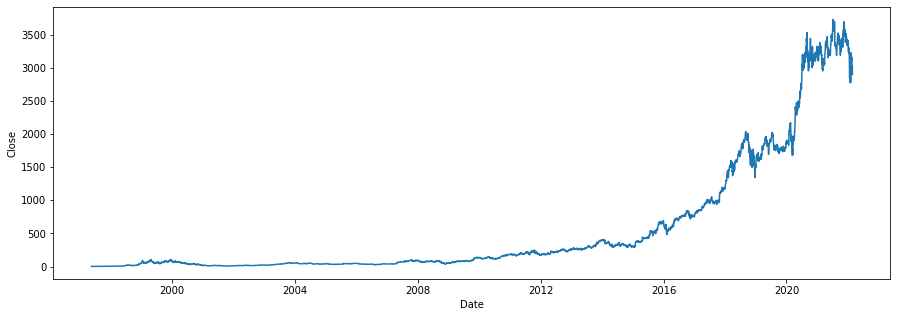

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=amazon.index,y=amazon['Close'])

In [ ]:
# LSTM 사실 알고보면 잘못된 모델.. 맹신 x


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
amazon.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [ ]:
mms=MinMaxScaler()
az_scaled=mms.fit_transform(amazon[['Open', 'High', 'Low', 'Close', 'Volume']])

In [ ]:
az_scaled

array([[2.75504936e-04, 2.78400127e-04, 1.67753003e-04, 1.50133646e-04,
        6.89739859e-01],
       [1.49789092e-04, 1.40525779e-04, 1.08227744e-04, 8.84716127e-05,
        1.36776220e-01],
       [9.36181823e-05, 8.48457531e-05, 8.38765013e-05, 8.31096968e-05,
        5.41107544e-02],
       ...,
       [8.04624203e-01, 8.10860256e-01, 8.03158086e-01, 8.04971032e-01,
        2.65876774e-02],
       [8.10893947e-01, 8.04393419e-01, 7.82408121e-01, 7.76174863e-01,
        2.57215665e-02],
       [7.47698999e-01, 8.04319179e-01, 7.54534066e-01, 8.11193536e-01,
        4.31400174e-02]])

In [ ]:
az_scaled=pd.DataFrame(az_scaled)

In [ ]:
az_scaled.columns=['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
az_scaled

,Open,High,Low,Close,Volume
0,0.000276,0.000278,0.000168,0.000150,0.689740
1,0.000150,0.000141,0.000108,0.000088,0.136776
2,0.000094,0.000085,0.000084,0.000083,0.054111
3,0.000086,0.000080,0.000089,0.000064,0.047952
4,0.000062,0.000053,0.000016,0.000008,0.176714
...,...,...,...,...,...
6233,0.845642,0.849924,0.835705,0.828858,0.025529
6234,0.831485,0.824208,0.816186,0.817861,0.025914
6235,0.804624,0.810860,0.803158,0.804971,0.026588
6236,0.810894,0.804393,0.782408,0.776175,0.025722


In [ ]:
# az_scaled.columns={['Open']:1} #이런식으로 하는게 있었는데..에러남

In [ ]:
# 학습데이터 : 과거 ~300일 이전까지의 데이터
# 테스트데이터 : 300일 전~ 현재까지의 데이터
train=az_scaled[:-300]
test=az_scaled[-300:]

In [ ]:
test

,Open,High,Low,Close,Volume
5938,0.849144,0.860535,0.855640,0.868512,0.037558
5939,0.867998,0.864912,0.871149,0.867204,0.028705
5940,0.867327,0.861176,0.857783,0.857974,0.053052
5941,0.854964,0.855017,0.856674,0.859188,0.032266
5942,0.855956,0.852965,0.860305,0.859279,0.018215
...,...,...,...,...,...
6233,0.845642,0.849924,0.835705,0.828858,0.025529
6234,0.831485,0.824208,0.816186,0.817861,0.025914
6235,0.804624,0.810860,0.803158,0.804971,0.026588
6236,0.810894,0.804393,0.782408,0.776175,0.025722


In [ ]:
# window_size를 30으로 설정, 30일동안의 주가 데이터 -> 다음날 주가 종가 예측
window_size=30

In [ ]:
train

,Open,High,Low,Close,Volume
0,0.000276,0.000278,0.000168,0.000150,0.689740
1,0.000150,0.000141,0.000108,0.000088,0.136776
2,0.000094,0.000085,0.000084,0.000083,0.054111
3,0.000086,0.000080,0.000089,0.000064,0.047952
4,0.000062,0.000053,0.000016,0.000008,0.176714
...,...,...,...,...,...
5933,0.846867,0.839978,0.835164,0.831848,0.034768
5934,0.826138,0.832695,0.832187,0.831121,0.024471
5935,0.827919,0.826509,0.831056,0.835124,0.024759
5936,0.838977,0.845546,0.846181,0.845995,0.035345


In [ ]:
train.columns
train_feature=train[['Open', 'High', 'Low', 'Volume']]

In [ ]:
train_label=train[['Close']]

In [ ]:
# 30일동안의 데이터로 설계
# 훈련 데이터를 위도우 크기에 따라 재구성

In [ ]:
len(train_feature)
train_feature.iloc[0:0+30]
train_feature.iloc[1:1+30]
# train_feature.iloc[2:2+30]
# train_feature.iloc[3:3+30]
# train_feature.iloc[5838:5838+30]

,Open,High,Low,Volume
1,0.000150,0.000141,0.000108,0.136776
2,0.000094,0.000085,0.000084,0.054111
3,0.000086,0.000080,0.000089,0.047952
4,0.000062,0.000053,0.000016,0.176714
5,0.000008,0.000000,0.000000,0.107617
6,0.000000,0.000019,0.000005,0.148709
7,0.000027,0.000053,0.000041,0.079035
8,0.000056,0.000050,0.000060,0.039291
9,0.000035,0.000024,0.000046,0.028705
10,0.000024,0.000016,0.000046,0.020236


In [ ]:
#train_feature.iloc[i:i+window_size]

In [ ]:
feature_list=[]
label_list=[]

In [ ]:
for i in range(len(train_feature) -window_size): #0~5670-1까지 반복
    feature_list.append(np.array(train_feature.iloc[i:i+window_size]))
    label_list.append(np.array(train_label.iloc[i+window_size]))

In [ ]:
feature_list=np.array(feature_list)
label_list=np.array(label_list)

In [ ]:
feature_list

array([[[2.75504936e-04, 2.78400127e-04, 1.67753003e-04, 6.89739859e-01],
        [1.49789092e-04, 1.40525779e-04, 1.08227744e-04, 1.36776220e-01],
        [9.36181823e-05, 8.48457531e-05, 8.38765013e-05, 5.41107544e-02],
        ...,
        [2.67480521e-05, 2.12114383e-05, 4.59967910e-05, 2.54059173e-03],
        [3.20976625e-05, 2.12114383e-05, 4.87024846e-05, 1.56169404e-02],
        [2.94228573e-05, 1.85600085e-05, 5.41138718e-05, 2.60102701e-02]],

       [[1.49789092e-04, 1.40525779e-04, 1.08227744e-04, 1.36776220e-01],
        [9.36181823e-05, 8.48457531e-05, 8.38765013e-05, 5.41107544e-02],
        [8.55937666e-05, 7.95428935e-05, 8.92878885e-05, 4.79517442e-02],
        ...,
        [3.20976625e-05, 2.12114383e-05, 4.87024846e-05, 1.56169404e-02],
        [2.94228573e-05, 1.85600085e-05, 5.41138718e-05, 2.60102701e-02],
        [2.94228573e-05, 1.85600085e-05, 4.59967910e-05, 6.76336313e-03]],

       [[9.36181823e-05, 8.48457531e-05, 8.38765013e-05, 5.41107544e-02],
        

In [ ]:
label_list

array([[2.41286216e-05],
       [3.75334114e-05],
       [3.21714955e-05],
       ...,
       [8.35123766e-01],
       [8.45995051e-01],
       [8.48180032e-01]])

In [ ]:
len(feature_list)

5908

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train. valid set 생성
xtrain, xvalid, ytrain, yvalid=train_test_split(feature_list, label_list, test_size=0.2)

In [ ]:
xtrain

array([[[0.01418182, 0.01414008, 0.01377198, 0.07585976],
        [0.01351044, 0.01345335, 0.01306038, 0.12041635],
        [0.01319214, 0.01313253, 0.01275464, 0.1166632 ],
        ...,
        [0.01361208, 0.01390145, 0.01375575, 0.0497802 ],
        [0.01410425, 0.0141825 , 0.01402361, 0.0634455 ],
        [0.01401063, 0.01389084, 0.01375033, 0.07287649]],

       [[0.0212647 , 0.02162241, 0.02142368, 0.04506471],
        [0.02181839, 0.02198035, 0.02201082, 0.04708563],
        [0.02229985, 0.0221686 , 0.02224892, 0.05430322],
        ...,
        [0.02397428, 0.02422346, 0.02415914, 0.02908978],
        [0.02422036, 0.02409619, 0.02402385, 0.03765465],
        [0.02430061, 0.02458406, 0.02438371, 0.07749575]],

       [[0.10226583, 0.10277207, 0.10327903, 0.02167972],
        [0.10322876, 0.10275086, 0.10300305, 0.01888891],
        [0.10160248, 0.10169559, 0.10232663, 0.01571317],
        ...,
        [0.1074175 , 0.10774085, 0.10830621, 0.02533663],
        [0.1087549 , 0.107809

In [ ]:
np.shape(xtrain) #(4670, 30, 4)
np.shape(xvalid) #(1168, 30, 4)

(1182, 30, 4)

In [ ]:
#LSTMd 에서는 array 형태여야 한다(list x)

In [ ]:
test

,Open,High,Low,Close,Volume
5938,0.849144,0.860535,0.855640,0.868512,0.037558
5939,0.867998,0.864912,0.871149,0.867204,0.028705
5940,0.867327,0.861176,0.857783,0.857974,0.053052
5941,0.854964,0.855017,0.856674,0.859188,0.032266
5942,0.855956,0.852965,0.860305,0.859279,0.018215
...,...,...,...,...,...
6233,0.845642,0.849924,0.835705,0.828858,0.025529
6234,0.831485,0.824208,0.816186,0.817861,0.025914
6235,0.804624,0.810860,0.803158,0.804971,0.026588
6236,0.810894,0.804393,0.782408,0.776175,0.025722


In [ ]:
xvalid

array([[[0.02376297, 0.02374355, 0.02115582, 0.23050866],
        [0.01661589, 0.02129098, 0.01655614, 0.28286024],
        [0.01968389, 0.02072623, 0.01804427, 0.19653787],
        ...,
        [0.01323226, 0.01414803, 0.01290345, 0.180178  ],
        [0.01435033, 0.01512641, 0.01445923, 0.19875126],
        [0.01535338, 0.01581313, 0.01455934, 0.23580156]],

       [[0.00351469, 0.00353966, 0.00343353, 0.02889731],
        [0.00350934, 0.00346807, 0.00320625, 0.05488063],
        [0.00319372, 0.00340709, 0.00320084, 0.05430322],
        ...,
        [0.00263736, 0.00298286, 0.00267593, 0.09780123],
        [0.00301451, 0.00311543, 0.00305202, 0.08952506],
        [0.00313487, 0.00313664, 0.0029952 , 0.05613168]],

       [[0.0374446 , 0.03710676, 0.03668921, 0.05411075],
        [0.03632118, 0.03658708, 0.03647275, 0.0497802 ],
        [0.03589856, 0.03562461, 0.03438125, 0.11724061],
        ...,
        [0.03180343, 0.03182246, 0.03139957, 0.06623631],
        [0.03172051, 0.032360

In [ ]:
test

,Open,High,Low,Close,Volume
5938,0.849144,0.860535,0.855640,0.868512,0.037558
5939,0.867998,0.864912,0.871149,0.867204,0.028705
5940,0.867327,0.861176,0.857783,0.857974,0.053052
5941,0.854964,0.855017,0.856674,0.859188,0.032266
5942,0.855956,0.852965,0.860305,0.859279,0.018215
...,...,...,...,...,...
6233,0.845642,0.849924,0.835705,0.828858,0.025529
6234,0.831485,0.824208,0.816186,0.817861,0.025914
6235,0.804624,0.810860,0.803158,0.804971,0.026588
6236,0.810894,0.804393,0.782408,0.776175,0.025722


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# test data 도 x, y값 나눠주기
test_feature=test[['Open', 'High', 'Low', 'Volume']]
test_label=test[['Close']]

In [ ]:
feature_test=[]
label_test=[]
for i in range(len(test_feature)-window_size): #0~5670-1까지 반복
    feature_test.append(np.array(test_feature.iloc[i:i+window_size]))
    label_test.append(np.array(test_label.iloc[i+window_size]))

In [ ]:
np.shape(feature_test) #(270, 30, 4)
# 4종류 30줄로 구성된 데이터가 270개 있다.
np.shape(label_test) #(270, 30, 1)
# 여러 개의 x값을 넣었을 때 하나의 y 값이 output되는 모델을 만드는 것이므로
# label_test (y)의 값의 shape는
# (270, 1) 이 되어야 한다.
np.shape(yvalid)

(1182, 1)

In [ ]:
label_test

[array([0.89583674]),
 array([0.90578846]),
 array([0.88770003]),
 array([0.89265176]),
 array([0.89832199]),
 array([0.89049091]),
 array([0.88568127]),
 array([0.88074295]),
 array([0.874188]),
 array([0.87836494]),
 array([0.87601642]),
 array([0.88665714]),
 array([0.89190914]),
 array([0.87090919]),
 array([0.85236769]),
 array([0.85605669]),
 array([0.84668138]),
 array([0.81923641]),
 array([0.8288262]),
 array([0.84309157]),
 array([0.82925515]),
 array([0.80525253]),
 array([0.79789867]),
 array([0.80403538]),
 array([0.79103005]),
 array([0.82076187]),
 array([0.8193651]),
 array([0.83436506]),
 array([0.82790395]),
 array([0.82581012]),
 array([0.82853933]),
 array([0.8403007]),
 array([0.81141606]),
 array([0.82400851]),
 array([0.83363583]),
 array([0.84077523]),
 array([0.82725515]),
 array([0.81631417]),
 array([0.81786108]),
 array([0.82421495]),
 array([0.81873507]),
 array([0.82913451]),
 array([0.84707548]),
 array([0.86469741]),
 array([0.86391725]),
 array([0.87881

In [ ]:
feature_test=np.array(feature_test)
label_test=np.array(label_test)

# LSTM 설계시 usually 'window_sliding' 사용해서 input 한다.

In [ ]:
np.shape(xtrain)

(4726, 30, 4)

In [ ]:
# activation 시도 종류 : tanh, relu, linear
# activation default로 tanh가 설정되어 있음
# 실행할때마다 학습한거 위에 다시 학습해서 뭔가 바꾸고 새로 돌리고싶을 땐 시퀀셜 꼭 다시 돌려줘야 한다 그래서 같이 넣어줌
model=Sequential()
# units : LSTM에서의 output
model.add(LSTM(16,
              input_shape=(np.shape(xtrain)[1],np.shape(xtrain)[2]),return_sequences=False))

In [ ]:
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
#줄어들지 않고 반복되는걸 몇번 참을거냐 10번 지나도 안줄어들면 중단
es=EarlyStopping(monitor='val_loss', patience=30)
# val_loss의 값이 가장 좋을 때 베스트를 저장한다.
cp=ModelCheckpoint('tmp_cp.h5',
                  monitor='val_loss', 
                   save_best_only=True)

In [ ]:
model.fit(xtrain, ytrain,
         epochs=100,
         batch_size=16,
         validation_data=(xvalid, yvalid),
         callbacks=[es,cp])

Epoch 1/100
296/296 [==============================] - 7s 16ms/step - loss: 8.2529e-04 - val_loss: 6.5342e-05
Epoch 2/100
296/296 [==============================] - 4s 13ms/step - loss: 5.9273e-05 - val_loss: 5.8206e-05
Epoch 3/100
296/296 [==============================] - 4s 13ms/step - loss: 5.7656e-05 - val_loss: 5.9613e-05
Epoch 4/100
296/296 [==============================] - 4s 12ms/step - loss: 5.5022e-05 - val_loss: 9.9643e-05
Epoch 5/100
296/296 [==============================] - 4s 13ms/step - loss: 5.3618e-05 - val_loss: 5.6017e-05
Epoch 6/100
296/296 [==============================] - 4s 13ms/step - loss: 5.4687e-05 - val_loss: 8.7536e-05
Epoch 7/100
296/296 [==============================] - 4s 13ms/step - loss: 5.3149e-05 - val_loss: 6.5381e-05
Epoch 8/100
296/296 [==============================] - 4s 13ms/step - loss: 4.8758e-05 - val_loss: 6.7334e-05
Epoch 9/100
296/296 [==============================] - 4s 13ms/step - loss: 5.7226e-05 - val_loss: 4.3884e-05
Epoch 10/1

In [ ]:
xtrain.shape
# window, data가 크면 연산량이 많다.

(4726, 30, 4)

In [ ]:
pred=model.predict(feature_test)

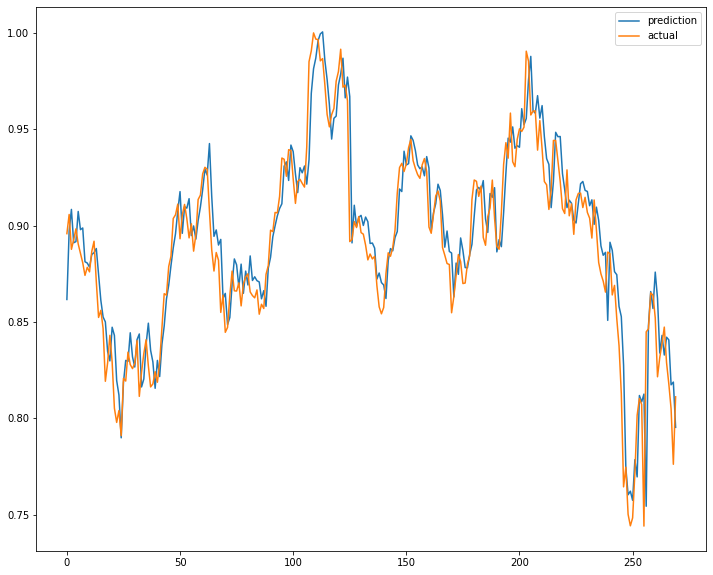

In [ ]:
pred
label_test
plt.figure(figsize=(12,10))
plt.plot(pred, label='prediction')
plt.plot(label_test, label='actual')
plt.legend()

In [ ]:
# timesteps:30
# input : [batch, timesteps, feature]
# batch=1이면 생략 가능